In [41]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = 7




path_figures=Path().cwd().parent.parent/"figures"
path_figures.mkdir(parents=True, exist_ok=True)
path_benchmark_data=Path.cwd().parent.parent/"benchmark_for_test"
path_benchmark_data.mkdir(parents=True, exist_ok=True)

In [ ]:
steps=[
    "build", 
    "update"]

original_library_size=[1_000, 10_000, 100_000, 1_000_000, 2_000_000, 10_000_000, 100_000_000]
add_size=100

search_type="hybrid"
ion_mode=[-1,1]


In [43]:
df=[]
for s in steps:
    for library_size in original_library_size:
        for charge in ion_mode:
            data={"library_number":library_size, "add_size":add_size, "step":s, "charge":charge}
            try:
                path_benchmark_dynamic=path_benchmark_data/f"dynamic_fast_update_{charge}_{add_size}_added_to_{library_size}_compare_time_{s}_step_{search_type}_options_library_size.txt"
                with open(path_benchmark_dynamic,"r") as f1:
                    dynamic=float(f1.readline().strip())
                data["dynamic_entropy_search(fast_update_mode)"]=dynamic
            except:
                data["dynamic_entropy_search(fast_update_mode)"]=None

            try:
                path_benchmark_flash=path_benchmark_data/f"flash_{charge}_{add_size}_added_to_{library_size}_compare_time_{s}_step_{search_type}_options_library_size.txt"
                with open(path_benchmark_flash,"r") as f1:
                    flash=float(f1.readline().strip())
                data["flash_entropy_search"]=flash
            except:
                data["flash_entropy_search"]=None

            try:
                path_benchmark_masstp=path_benchmark_data/f"masstplus_{charge}_{add_size}_added_to_{library_size}_compare_time_{s}_step_{search_type}_options_library_size.txt"
                with open(path_benchmark_masstp,"r") as f1:
                    masstp=float(f1.readline().strip())
                data["masstplus"]=masstp
            except:
                data["masstplus"]=None

            df.append(pd.DataFrame([data]))
        
df=pd.concat(df)
df


/tmp/ipykernel_1223091/1017651318.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df=pd.concat(df)


,library_number,add_size,step,charge,dynamic_entropy_search(fast_update_mode),flash_entropy_search,masstplus
0,1000,100,build,-1,0.139481,0.220137,0.177895
0,1000,100,build,1,0.159016,0.243073,0.255046
0,10000,100,build,-1,0.421168,0.531691,0.994371
0,10000,100,build,1,0.606622,0.678661,1.653793
0,100000,100,build,-1,3.123692,3.596756,9.161507
0,100000,100,build,1,4.747268,5.181563,17.947337
0,1000000,100,build,-1,30.185387,34.948121,286.081878
0,1000000,100,build,1,48.202495,51.830766,1016.578049
0,10000000,100,build,-1,315.577380,NaN,NaN
0,10000000,100,build,1,498.413899,NaN,NaN


In [44]:

df_data = df[["library_number", 
              "charge",
              "step",
            "dynamic_entropy_search(fast_update_mode)", 
            "flash_entropy_search",
            "masstplus"]]

    
df_melted=df_data.melt(id_vars=["charge", "step", "library_number"], var_name="type", value_name="time")
df_melted


,charge,step,library_number,type,time
0,-1,build,1000,dynamic_entropy_search(fast_update_mode),0.139481
1,1,build,1000,dynamic_entropy_search(fast_update_mode),0.159016
2,-1,build,10000,dynamic_entropy_search(fast_update_mode),0.421168
3,1,build,10000,dynamic_entropy_search(fast_update_mode),0.606622
4,-1,build,100000,dynamic_entropy_search(fast_update_mode),3.123692
...,...,...,...,...,...
67,1,update,1000000,masstplus,27.642194
68,-1,update,10000000,masstplus,NaN
69,1,update,10000000,masstplus,NaN
70,-1,update,100000000,masstplus,NaN


/tmp/ipykernel_1223091/3451169917.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charge['log_library_number'] = np.log10(df_charge['library_number'])


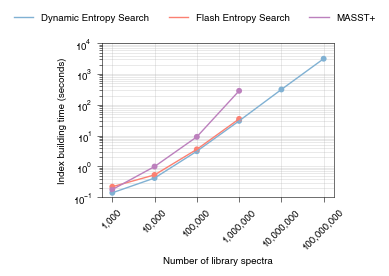

In [45]:
charge=-1
step="build"
df_charge=df_melted[(df_melted["charge"]==charge) & (df_melted["step"]==step)]

# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update_mode)": color_palette_set2[4],
    "flash_entropy_search": color_palette_set2[3],
    "masstplus": color_palette_set2[-3],
}
fig, ax = plt.subplots(figsize=(3, 2))

ax.tick_params(which="both", width=0.4)          
for spine in ax.spines.values():  
    spine.set_linewidth(0.4)
    
df_charge['log_library_number'] = np.log10(df_charge['library_number'])
library_sizes = sorted(df_charge['library_number'].unique())
log_library_sizes = np.log10(library_sizes)
sns.scatterplot(x="log_library_number", y="time", hue="type", data=df_charge, 
            palette=color_palette, size=1, alpha=1, legend=False, zorder=5, edgecolors='none')


sns.lineplot(x="log_library_number", y="time", hue="type", data=df_charge, 
            palette=color_palette, estimator=np.median, errorbar=None, linewidth=1, zorder=5)

plt.xticks(log_library_sizes, [f"{size:,.0f}" for size in library_sizes])
plt.yscale("log")



# Add grid
plt.grid(True, which="both", ls="-", alpha=0.5, zorder=1, linewidth=0.4)

# Set y-axis title
plt.ylabel(f"Index building time (seconds)")

plt.xticks(rotation=45)
plt.ylim(top=1e4, bottom=1e-1)
if charge==-1:
    mode="-"
elif charge==1:
    mode="+"
plt.xlabel(f"Number of library spectra")

# Change legend
handles, labels = ax.get_legend_handles_labels()
legend_dict = {l: h for h, l in zip(handles, labels)}
labels_new = ["Dynamic Entropy Search", "Flash Entropy Search", "MASST+"]
handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update_mode)", "flash_entropy_search", "masstplus"]]

# Move legend to the top
ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=3, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"compare_time_different_library_scale_{step}_step_{charge}_options_library_size.svg", bbox_inches="tight",dpi=1200)

/tmp/ipykernel_1223091/2030253688.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charge['log_library_number'] = np.log10(df_charge['library_number'])


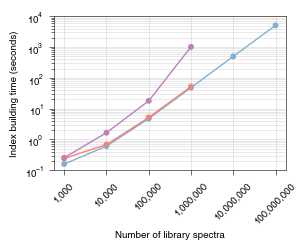

In [46]:
charge=1
step="build"
df_charge=df_melted[(df_melted["charge"]==charge) & (df_melted["step"]==step)]


# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update_mode)": color_palette_set2[4],
    "flash_entropy_search": color_palette_set2[3],
    "masstplus": color_palette_set2[-3],
}
fig, ax = plt.subplots(figsize=(3, 2))

ax.tick_params(which='both', width=0.4)          
for spine in ax.spines.values():  
    spine.set_linewidth(0.4)
    
df_charge['log_library_number'] = np.log10(df_charge['library_number'])
library_sizes = sorted(df_charge['library_number'].unique())
log_library_sizes = np.log10(library_sizes)
sns.scatterplot(x="log_library_number", y="time", hue="type", data=df_charge, 
            palette=color_palette, size=1, alpha=1, legend=False, zorder=5, edgecolors='none')


sns.lineplot(x="log_library_number", y="time", hue="type", data=df_charge, 
            palette=color_palette, estimator=np.median, errorbar=None, linewidth=1, legend=False, zorder=5)

plt.xticks(log_library_sizes, [f"{size:,.0f}" for size in library_sizes])
plt.yscale("log")



# Add grid
plt.grid(True, which="both", ls="-", alpha=0.5, zorder=1, linewidth=0.4)

# Set y-axis title
plt.ylabel(f"Index building time (seconds)")

plt.xticks(rotation=45)
plt.ylim(top=1e4, bottom=1e-1)
if charge==-1:
    mode="-"
elif charge==1:
    mode="+"
plt.xlabel(f"Number of library spectra")

# Change legend
# handles, labels = ax.get_legend_handles_labels()
# legend_dict = {l: h for h, l in zip(handles, labels)}
# labels_new = ["Dynamic Entropy Search \n(fast update mode)", "Flash Entropy Search", "MASST+"]
# handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update_mode)", "flash_entropy_search", "masstplus"]]
# ax.legend(handles_new, labels_new, frameon=False, loc="upper left", markerscale=4, bbox_to_anchor=(1, 0.65))
# Move legend to the top
# ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=2, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"compare_time_different_library_scale_{step}_step_{charge}_options_library_size.svg", bbox_inches="tight", dpi=1200)

/tmp/ipykernel_1223091/3794032360.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charge['log_library_number'] = np.log10(df_charge['library_number'])


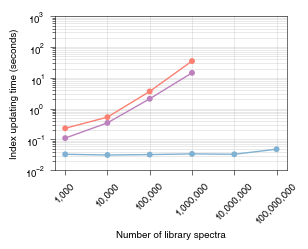

In [47]:
charge=-1
step="update"
df_charge=df_melted[(df_melted["charge"]==charge) & (df_melted["step"]==step)]


# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update_mode)": color_palette_set2[4],
    "flash_entropy_search": color_palette_set2[3],
    "masstplus": color_palette_set2[-3],
}
fig, ax = plt.subplots(figsize=(3, 2))

ax.tick_params(which='both', width=0.4)          
for spine in ax.spines.values():  
    spine.set_linewidth(0.4)
    
df_charge['log_library_number'] = np.log10(df_charge['library_number'])
library_sizes = sorted(df_charge['library_number'].unique())
log_library_sizes = np.log10(library_sizes)
sns.scatterplot(x="log_library_number", y="time", hue="type", data=df_charge, 
            palette=color_palette, size=1, alpha=1, legend=False, zorder=5, edgecolors='none')


sns.lineplot(x="log_library_number", y="time", hue="type", data=df_charge, 
            palette=color_palette, estimator=np.median, errorbar=None, linewidth=1, legend=False, zorder=5)

plt.xticks(log_library_sizes, [f"{size:,.0f}" for size in library_sizes])
plt.yscale("log")



# Add grid
plt.grid(True, which="both", ls="-", alpha=0.5, zorder=1, linewidth=0.4)

# Set y-axis title
plt.ylabel(f"Index updating time (seconds)")

plt.xticks(rotation=45)
plt.ylim(top=1e3, bottom=1e-2)
if charge==-1:
    mode="-"
elif charge==1:
    mode="+"
plt.xlabel(f"Number of library spectra")

# Change legend
# handles, labels = ax.get_legend_handles_labels()
# legend_dict = {l: h for h, l in zip(handles, labels)}
# labels_new = ["Dynamic Entropy Search \n(fast update mode)", "Flash Entropy Search", "MASST+"]
# handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update_mode)", "flash_entropy_search", "masstplus"]]
# ax.legend(handles_new, labels_new, frameon=False, loc="upper left", markerscale=4, bbox_to_anchor=(1, 0.65))
# Move legend to the top
# ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=2, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"compare_time_different_library_scale_{step}_step_{charge}_options_library_size.svg", bbox_inches="tight", dpi=1200)

/tmp/ipykernel_1223091/1709639569.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charge['log_library_number'] = np.log10(df_charge['library_number'])


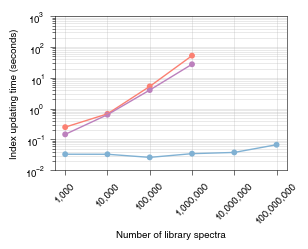

In [48]:
charge=1
step="update"
df_charge=df_melted[(df_melted["charge"]==charge) & (df_melted["step"]==step)]


# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update_mode)": color_palette_set2[4],
    "flash_entropy_search": color_palette_set2[3],
    "masstplus": color_palette_set2[-3],
}
fig, ax = plt.subplots(figsize=(3, 2))

ax.tick_params(which='both', width=0.4)          
for spine in ax.spines.values():  
    spine.set_linewidth(0.4)

df_charge['log_library_number'] = np.log10(df_charge['library_number'])
library_sizes = sorted(df_charge['library_number'].unique())
log_library_sizes = np.log10(library_sizes)
sns.scatterplot(x="log_library_number", y="time", hue="type", data=df_charge, 
            palette=color_palette, size=1, alpha=1, legend=False, zorder=5, edgecolors='none')


sns.lineplot(x="log_library_number", y="time", hue="type", data=df_charge, 
            palette=color_palette, estimator=np.median, errorbar=None, linewidth=1, legend=False, zorder=5)

plt.xticks(log_library_sizes, [f"{size:,.0f}" for size in library_sizes])
plt.yscale("log")



# Add grid
plt.grid(True, which="both", ls="-", alpha=0.5, zorder=1, linewidth=0.4)

# Set y-axis title
plt.ylabel(f"Index updating time (seconds)")

plt.xticks(rotation=45)
plt.ylim(top=1e3, bottom=1e-2)
if charge==-1:
    mode="-"
elif charge==1:
    mode="+"
plt.xlabel(f"Number of library spectra")

# Change legend
# handles, labels = ax.get_legend_handles_labels()
# legend_dict = {l: h for h, l in zip(handles, labels)}
# labels_new = ["Dynamic Entropy Search \n(fast update mode)", "Flash Entropy Search", "MASST+"]
# handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update_mode)", "flash_entropy_search", "masstplus"]]
# ax.legend(handles_new, labels_new, frameon=False, loc="upper left", markerscale=4, bbox_to_anchor=(1, 0.65))
# Move legend to the top
# ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=2, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"compare_time_different_library_scale_{step}_step_{charge}_options_library_size.svg", bbox_inches="tight", dpi=1200)